**Logistic Regression & Naive Bayes Classification**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, 
                           confusion_matrix, f1_score, precision_score, 
                           recall_score)
from sklearn.model_selection import cross_val_score
import time

**Load the Preprocessed Data**

In [21]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

train_df = pd.read_csv('../data/cleaned_train.csv')

print(f"Shape of training data: {train_df.shape}")
print(f"Number of features: {train_df.shape[1] - 1}")
print(f"Number of samples: {train_df.shape[0]}")

train_df.head()

Shape of training data: (7352, 563)
Number of features: 562
Number of samples: 7352


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2


**Data Preparation**

In [22]:
X_train = train_df.drop('Activity', axis=1)
y_train = train_df['Activity']

print("Feature matrix shape:", X_train.shape)
print("Target vector shape:", y_train.shape)
print("\nTarget distribution:")
print(y_train.value_counts().sort_index())

n_classes = y_train.nunique()
print(f"\nNumber of activity classes: {n_classes}")

Feature matrix shape: (7352, 562)
Target vector shape: (7352,)

Target distribution:
Activity
0    1407
1    1286
2    1374
3    1226
4     986
5    1073
Name: count, dtype: int64

Number of activity classes: 6


**Feature Scaling For logistic regression**

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

**Model Training - Logistic Regression**

In [24]:
# Initialize Logistic Regression
# Using 'lbfgs' solver for multiclass, increased max_iter for convergence

lr_model = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42,
    n_jobs=-1  # all CPU cores usage
)

# Train the model

start_time = time.time()
lr_model.fit(X_train_scaled, y_train)
lr_train_time = time.time() - start_time

print(f"Training completed in {lr_train_time:.2f} seconds")

Training completed in 6.01 seconds


**Model Training - Naive Bayes**

**Evaluation of  Logistic Regression on Training Data**

In [25]:
# Make predictions
y_pred_lr = lr_model.predict(X_train_scaled)

# Calculate metrics
lr_accuracy = accuracy_score(y_train, y_pred_lr)
lr_precision = precision_score(y_train, y_pred_lr, average='weighted')
lr_recall = recall_score(y_train, y_pred_lr, average='weighted')
lr_f1 = f1_score(y_train, y_pred_lr, average='weighted')

print(f"Accuracy:  {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")

Accuracy:  0.9962
Precision: 0.9962
Recall:    0.9962
F1-Score:  0.9962


**Cross-Validation for Logistic Regression**

In [26]:
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print(f"Cross-validation scores: {cv_scores_lr}")
print(f"Mean CV Accuracy: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std() * 2:.4f})")

Cross-validation scores: [0.92386132 0.89055065 0.94421769 0.94965986 0.96326531]
Mean CV Accuracy: 0.9343 (+/- 0.0506)


**Confusion Matrix - Logistic Regression**

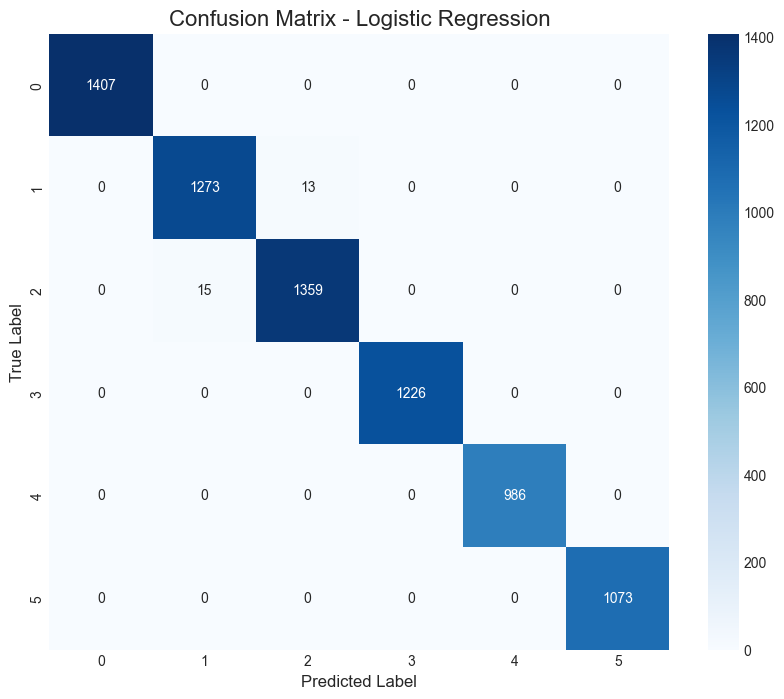


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1407
           1     0.9884    0.9899    0.9891      1286
           2     0.9905    0.9891    0.9898      1374
           3     1.0000    1.0000    1.0000      1226
           4     1.0000    1.0000    1.0000       986
           5     1.0000    1.0000    1.0000      1073

    accuracy                         0.9962      7352
   macro avg     0.9965    0.9965    0.9965      7352
weighted avg     0.9962    0.9962    0.9962      7352



In [27]:
# Create confusion matrix
cm_lr = confusion_matrix(y_train, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=range(n_classes), yticklabels=range(n_classes))
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

print("\nClassification Report - Logistic Regression:")
print("="*60)
print(classification_report(y_train, y_pred_lr, digits=4))

**Model Training - Naive Bayes**

In [28]:
# Initialize Naive Bayes
nb_model = GaussianNB()

# Train the model
start_time = time.time()
nb_model.fit(X_train, y_train)
nb_train_time = time.time() - start_time

print(f"Training completed in {nb_train_time:.2f} seconds")

Training completed in 0.22 seconds


**Evaluate Naive Bayes on Training Data**

In [29]:
# Make predictions
y_pred_nb = nb_model.predict(X_train)

# Calculate metrics
nb_accuracy = accuracy_score(y_train, y_pred_nb)
nb_precision = precision_score(y_train, y_pred_nb, average='weighted')
nb_recall = recall_score(y_train, y_pred_nb, average='weighted')
nb_f1 = f1_score(y_train, y_pred_nb, average='weighted')

print(f"Accuracy:  {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall:    {nb_recall:.4f}")
print(f"F1-Score:  {nb_f1:.4f}")

Accuracy:  0.7516
Precision: 0.7998
Recall:    0.7516
F1-Score:  0.7534


**Cross-Validation for Naive Bayes**

In [30]:
cv_scores_nb = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print(f"Cross-validation scores: {cv_scores_nb}")
print(f"Mean CV Accuracy: {cv_scores_nb.mean():.4f} (+/- {cv_scores_nb.std() * 2:.4f})")

Cross-validation scores: [0.6546567  0.59007478 0.80408163 0.71836735 0.68503401]
Mean CV Accuracy: 0.6904 (+/- 0.1416)


**Confusion Matrix - Naive Bayes**

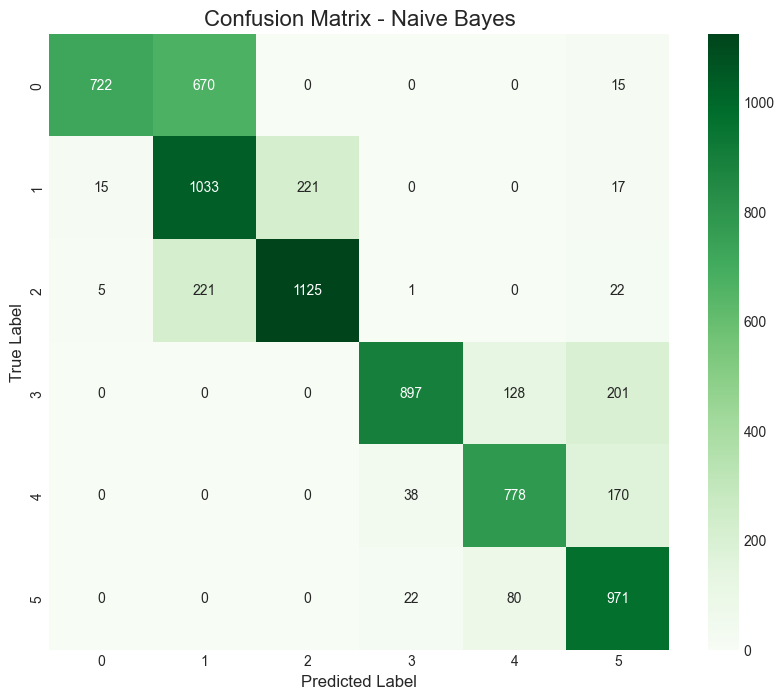


Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0     0.9730    0.5131    0.6719      1407
           1     0.5369    0.8033    0.6436      1286
           2     0.8358    0.8188    0.8272      1374
           3     0.9363    0.7316    0.8214      1226
           4     0.7890    0.7890    0.7890       986
           5     0.6956    0.9049    0.7866      1073

    accuracy                         0.7516      7352
   macro avg     0.7944    0.7601    0.7566      7352
weighted avg     0.7998    0.7516    0.7534      7352



In [31]:
# Create confusion matrix
cm_nb = confusion_matrix(y_train, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=range(n_classes), yticklabels=range(n_classes))
plt.title('Confusion Matrix - Naive Bayes', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

print("\nClassification Report - Naive Bayes:")
print("="*60)
print(classification_report(y_train, y_pred_nb, digits=4))

**Model Comparison**

In [32]:
comparison_data = {
    'Model': ['Logistic Regression', 'Naive Bayes'],
    'Accuracy': [lr_accuracy, nb_accuracy],
    'Precision': [lr_precision, nb_precision],
    'Recall': [lr_recall, nb_recall],
    'F1-Score': [lr_f1, nb_f1],
    'Training Time (s)': [lr_train_time, nb_train_time],
    'Mean CV Accuracy': [cv_scores_lr.mean(), cv_scores_nb.mean()]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

display(comparison_df)

,Model,Accuracy,Precision,Recall,F1-Score,Training Time (s),Mean CV Accuracy
0,Logistic Regression,0.9962,0.9962,0.9962,0.9962,6.0121,0.9343
1,Naive Bayes,0.7516,0.7998,0.7516,0.7534,0.2194,0.6904


**Observations Summary**

**Logistic Regression:**

* Train acc: **99.62%**, CV acc: **93.43% ±5.06%** → mild overfitting
* Excellent precision/recall (F1 > 0.989 across classes)
* Perfect/near-perfect classification for most activities

**Naive Bayes:**

* Train acc: **75.16%**, CV acc: **69.04% ±14.16%** → unstable, underperforms
* Strong confusion between static activities (standing/sitting)
* Independence assumption violated by correlated sensor data

We can use Logistic Regression with L1/L2 regularization and feature reduction for better accuracy, and explore ensembles or deep learning in the future.
